# Uber Picking Up in Manhattan Analysis

## Zhang Qinhao - z5263046

# 1. Introduction:

The main source of this data analysis is the Uber data provided by Data.world. I chose this set of data for my research because of the rising cost of living and the busy urban traffic. Uber needs to arrange the driver's area and time more reasonably, so I chose this set of data to have a positive impact on Uber and passengers.

### 2. Imprting necessary module and dataset

In [391]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import warnings; warnings.simplefilter('ignore')
from matplotlib import style
%matplotlib inline

In [255]:
uber_df = pd.read_csv('C:\Users\admin\Desktop\uber-raw-data-apr14')

### 3. Data cleaning

#### Browse the first five lines and the last five lines of data sources

In [256]:
uber_df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [257]:
uber_df.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


Checking the information of dataset

In [258]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [259]:
type(uber_df)

pandas.core.frame.DataFrame

Setting the date time to the index 

In [260]:
uber_df.set_index(uber_df['Date/Time'],inplace = True)
uber_df.index = pd.to_datetime(uber_df.index)
del uber_df['Date/Time']
uber_df.head()

,Lat,Lon,Base
Date/Time,,,
2014-04-01 00:11:00,40.7690,-73.9549,B02512
2014-04-01 00:17:00,40.7267,-74.0345,B02512
2014-04-01 00:21:00,40.7316,-73.9873,B02512
2014-04-01 00:28:00,40.7588,-73.9776,B02512
2014-04-01 00:33:00,40.7594,-73.9722,B02512


Splitting the datetime into other different columns for processing data easily

In [261]:
uber_df['Date'] = uber_df.index.day
uber_df['Weekday'] = uber_df.index.weekday
uber_df['Hour'] = uber_df.index.hour
uber_df['Minute'] = uber_df.index.minute
uber_df.head()

,Lat,Lon,Base,Date,Weekday,Hour,Minute
Date/Time,,,,,,,
2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0,11
2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0,17
2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0,21
2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0,28
2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0,33


### 4. Data Visualization

#### a. Uber Daily Statistics

First, we calculate the daily Uber usage in mid-April, and then draw a line chart according to the daily usage to reflect the trend of Uber vehicle change. Next, use the 5-day moving average as a trend to see the changes in Uber usage in April. 

[(1, 14546), (2, 17474), (3, 20701), (4, 26714), (5, 19521), (6, 13445), (7, 19550), (8, 16188), (9, 16843), (10, 20041), (11, 20420), (12, 18170), (13, 12112), (14, 12674), (15, 20641), (16, 17717), (17, 20973), (18, 18074), (19, 14602), (20, 11017), (21, 13162), (22, 16975), (23, 20346), (24, 23352), (25, 25095), (26, 24925), (27, 14677), (28, 15475), (29, 22835), (30, 36251)]


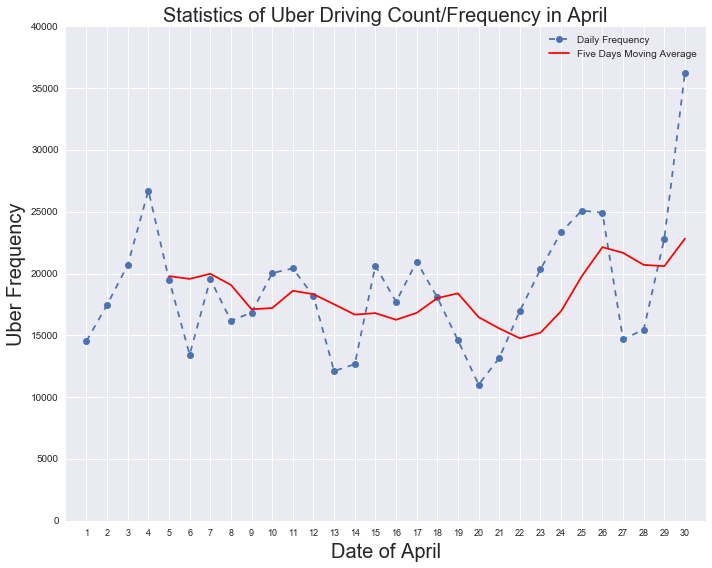

In [262]:
Date_lists = list(uber_df['Date'])
Date_count_set = set(Date_lists)
Date_count_list = list()
for k in Date_count_set:
    Date_count_list.append((k,Date_lists.count(k)))
print (Date_count_list)
Date_count = pd.DataFrame(Date_count_list)
Date_count['SMA_5'] = Date_count[1].rolling(5).mean()

plt.style.use('seaborn')
plt.figure(figsize = (10,8))
Date_line, = plt.plot(Date_count[0],Date_count[1],'--',marker = 'o')
Moving_line, = plt.plot(Date_count[0],Date_count['SMA_5'],'r')
plt.ylabel('Uber Frequency',size = 20)
plt.xlabel('Date of April',size = 20)
plt.title('Statistics of Uber Driving Count/Frequency in April',size = 20)
plt.axis([0,31,0,40000])
plt.xticks(Date_count[0], fontsize=9)
plt.legend(loc='best',handles=[Date_line,Moving_line],labels=['Daily Frequency','Five Days Moving Average'])
plt.tight_layout()

The 5-day average feedback showed that the usage of Uber in the middle of the month was lower than that in the beginning of the month, but the usage of Uber at the end of the month was greatly improved. We continue to rank daily usage. Indeed, 26th to 30th are in the top five.

In [263]:
Date_count = Date_count.fillna(0)
Date_count.sort_values(by = 1,ascending = False).head(5)

,0,1,SMA_5
29,30,36251,22832.6
3,4,26714,0.0
24,25,25095,19786.0
25,26,24925,22138.6
23,24,23352,16970.4


Less frequent using Uber of days in the middle of the month

In [264]:
Date_count.sort_values(by = 1).head(5)

,0,1,SMA_5
19,20,11017,16476.6
12,13,12112,17517.2
13,14,12674,16683.4
20,21,13162,15565.6
5,6,13445,19571.0


#### b. Uber Hourly statistics

Uber frequencies should be higher in the morning and evening hours, so we draw a time-based frequency histogram.

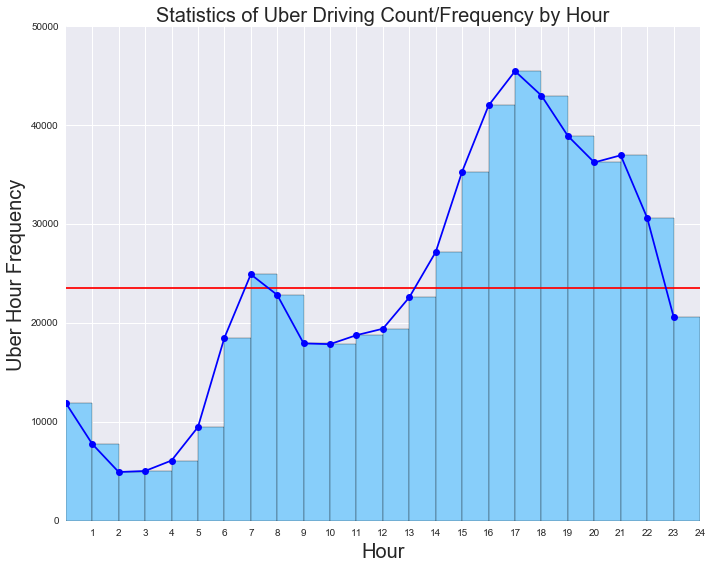

In [310]:
Hour_count = uber_df['Hour']
Hour_count.hist(bins=24, figsize=(10,8),range= (0,24),color = '#87CEFA')
plt.xticks(range(1,25))

def counts(i):
    return len(i)
Hour = uber_df.groupby('Hour').apply(counts)
plt.axhline(y = Hour.mean(), color='r')
plt.plot(Hour,marker= 'o',color = 'b')
plt.ylabel('Uber Hour Frequency',size = 20)
plt.xlabel('Hour',size = 20)
plt.title('Statistics of Uber Driving Count/Frequency by Hour',size = 20)
plt.tight_layout()

The use of vehicles from 4 p.m. to 9 p.m. is significantly higher than usual, which also confirms our conjecture.

#### c. Weekday Uber Frequency

We also need to look at weekly usage. Uber usage on weekdays from Monday to Friday is significantly higher than on weekends, which indicates that people tend to use more Uber on commutes and on weekends they may prefer to drive by themselves.

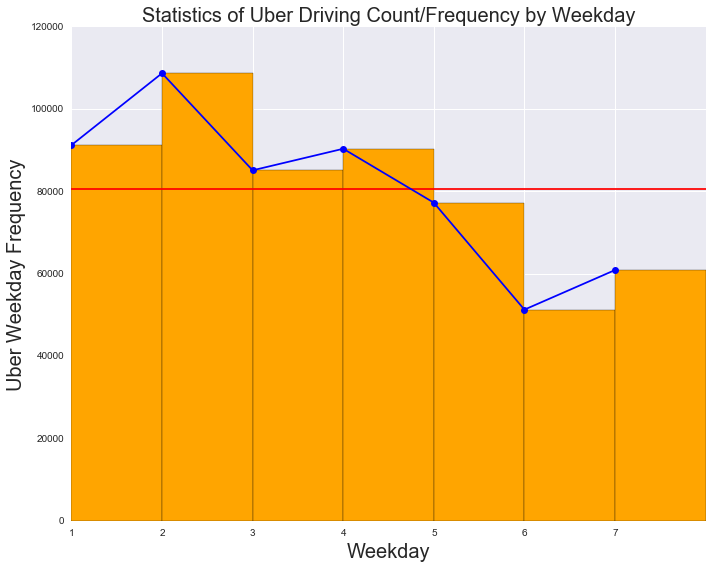

In [274]:
uber_df.loc[uber_df['Weekday'] == 0,'Weekday']=7

Weekday_count = uber_df['Weekday']
Weekday_count.hist(bins=7, figsize=(10,8),range= (1,8),color = 'orange')
plt.xticks(range(1,8))

Weekday = uber_df.groupby('Weekday').apply(counts)
plt.axhline(y = Weekday.mean(), color='r')
plt.plot(Weekday,marker= 'o',color = 'b')
plt.ylabel('Uber Weekday Frequency',size = 20)
plt.xlabel('Weekday',size = 20)
plt.title('Statistics of Uber Driving Count/Frequency by Weekday',size = 20)
plt.tight_layout()

#### d. Heat map of hour Uber Picking up in everyday

Finally, for the analysis of time, we separated the working day and time to draw a thermogram to see the Uber usage per hour per day.

In [273]:
Corr_data = uber_df.groupby('Weekday Hour'.split()).apply(counts).unstack()
Corr_data

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018
7,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091


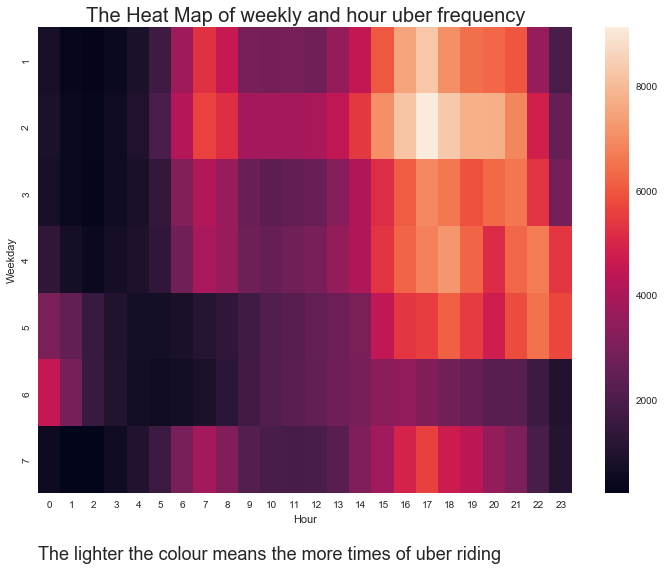

In [300]:
plt.figure(figsize =(10,8))
sns.heatmap(Corr_data)
plt.title('The Heat Map of weekly and hour uber frequency',size =20)
plt.text(0,8,'The lighter the colour means the more times of uber riding',size =18)
plt.tight_layout()

#### e. Uber Analysis based on Base

Organize and sort Base data

In [308]:
Base_data = pd.DataFrame(uber_df.groupby('Base').apply(counts))
Base_data.sort_values(by = 0)

,0
Base,
B02764,9908
B02512,35536
B02617,108001
B02598,183263
B02682,227808


Draw a frequency histogram in the order of Base addresses to see which area has more Uber usage

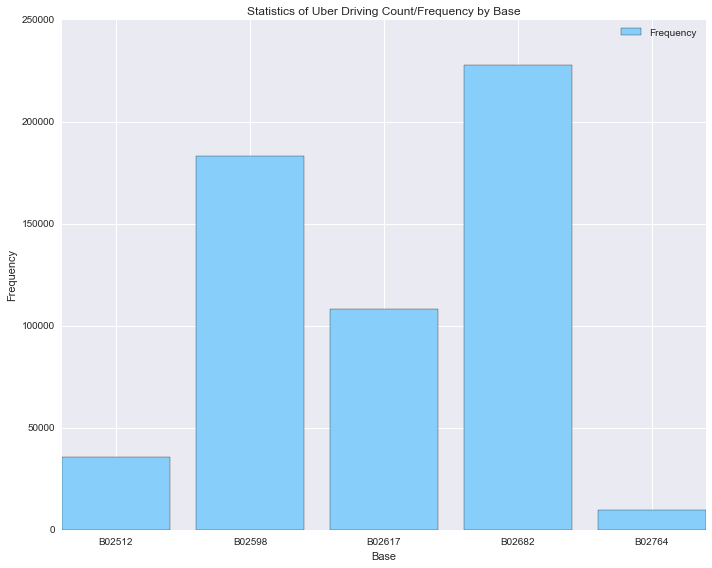

In [316]:
plt.figure(figsize=(10, 8))
plt.bar(Base_data.index,Base_data[0],label ='Frequency',color ='#87CEFA')
plt.xlabel('Base')
plt.ylabel('Frequency')
plt.title('Statistics of Uber Driving Count/Frequency by Base')
plt.legend(loc="upper right")
plt.tight_layout()

#### e. Uber Analysis based on Location

The data includes the longitude and latitude of Uber's call location. First, we roughly count the average calling location.

In [324]:
location_data = uber_df.ix[:,0:2]
location_data.describe()

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


The longitude and latitude are used as benchmarks to calculate Uber usage frequency in Manhattan and draw the fitting curve of normal distribution. We assume that the frequency of use should conform to the normal distribution, depending on the fixed location.

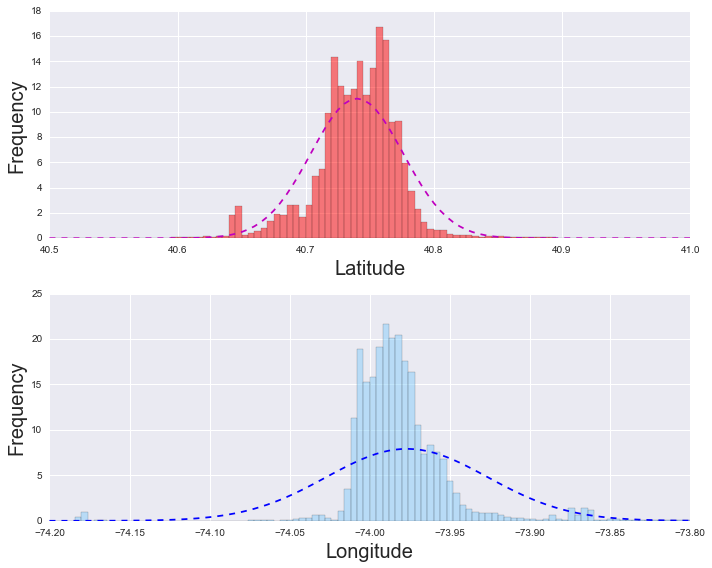

In [410]:
plt.figure(figsize =(10,8))
plt.title('Uber Count by Location', size = 20)
plt.subplot(2,1,1)
pn, bins, patches = plt.hist(uber_df['Lat'], bins = 100,
                            normed=1,range = (40.5, 41.0), color = "red",alpha =0.5)
Mean = location_data['Lat'].mean()
Std =  location_data['Lat'].std()
y = mlab.normpdf(bins, Mean, Std)
plt.plot(bins, y, 'm--')
plt.xlabel('Latitude', size = 20)
plt.ylabel('Frequency', size = 20)

plt.subplot(2,1,2)
n, bins2, patches = plt.hist(uber_df['Lon'], bins = 100, 
                             normed=1,range = (-74.2, -73.8), color = "#87CEFA",alpha =0.5)
Mean2 = location_data['Lon'].mean()
Std2 =  location_data['Lon'].std()
y2 = mlab.normpdf(bins2, Mean2, Std2)
plt.plot(bins2, y2, 'b--')
plt.xlabel('Longitude', size = 20)
plt.ylabel('Frequency', size = 20)

plt.tight_layout()

Drawing latitude and longitude into a graph can better highlight the relationship between the two.Drawing latitude and longitude into a graph can better highlight the relationship between the two. The deviation of Latitude is negative; the deviation of longtitude is positive.

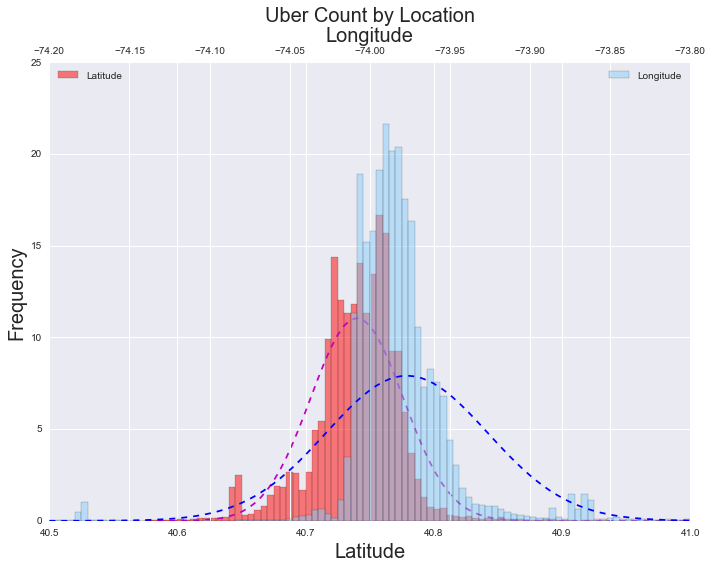

In [409]:
plt.figure(figsize =(10,8))
plt.title('Uber Count by Location', size = 20)
plt.hist(uber_df['Lat'], bins = 100, range = (40.5, 41.0), 
         normed=1,color = "red",alpha = 0.5
        ,label = 'Latitude')
plt.xlabel('Latitude', size = 20)
plt.ylabel('Frequency', size = 20)
plt.legend(loc="upper left")
Mean = location_data['Lat'].mean()A
Std =  location_data['Lat'].std()
y = mlab.normpdf(bins, Mean, Std)
plt.plot(bins, y, 'm--')
plt.twiny()
plt.hist(uber_df['Lon'], bins = 100, range = (-74.2, -73.8), 
         normed=1,color = "#87CEFA",
         alpha = 0.5, label = 'Longitude')
plt.xlabel('Longitude', size = 20)
plt.ylabel('Frequency', size = 20)
plt.legend(loc="upper right")
Mean2 = location_data['Lon'].mean()
Std2 =  location_data['Lon'].std()
y2 = mlab.normpdf(bins2, Mean2, Std2)
plt.plot(bins2, y2, 'b--')
plt.tight_layout()

Finally, we use latitude and longitude as the horizontal and vertical coordinates to roughly draw the map used by Uber in Manhattan. Interestingly, this map is basically a brief version of the map of Manhattan, which also reflects the Uber usage in this area can well indicate the degree of urban development.

As most of the locations are concentrated in a small area at the lower left, we draw that small area separately.

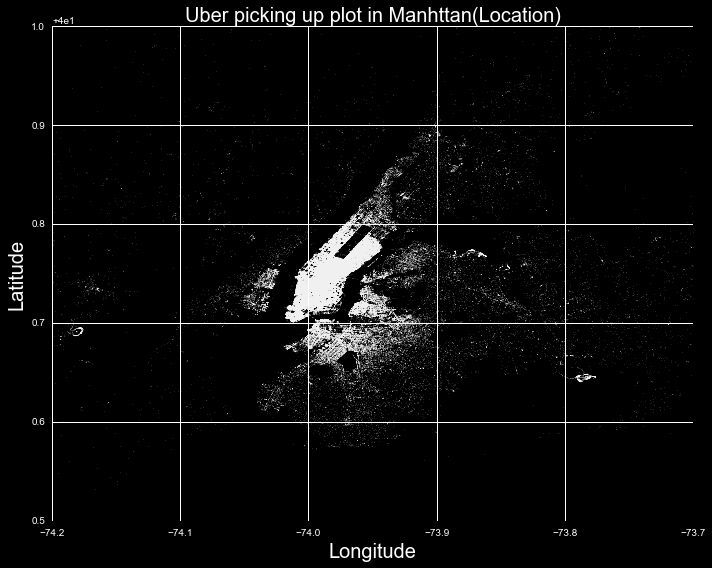

In [443]:
plt.figure(figsize =(10,8))
plt.style.use('dark_background')
plt.plot(uber_df['Lon'], uber_df['Lat'],'.',ms =0.7, alpha = 0.7,color ='w')
plt.xlim(-74.2, -73.7)
plt.ylim(40.5, 41.0)
plt.xlabel('Longitude', size = 20)
plt.ylabel('Latitude', size = 20)
plt.title('Uber picking up plot in Manhttan(Location)', size = 20)
plt.tight_layout()